# Spectral statistics

In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

from wavespectra import read_ww3

datadir = Path("../data")

dset = read_ww3(datadir / "ww3file.nc").load()
dset

<xarray.Dataset>
Dimensions:  (dir: 24, time: 9, site: 2, freq: 25)
Coordinates:
  * dir      (dir) float32 270.0 255.0 240.0 225.0 ... 330.0 315.0 300.0 285.0
  * freq     (freq) float32 0.04118 0.0453 0.04983 ... 0.3352 0.3687 0.4056
  * site     (site) int32 1 2
  * time     (time) datetime64[ns] 2014-12-01 2014-12-01T12:00:00 ... 2014-12-05
Data variables:
    dpt      (time, site) float32 106.6 818.7 106.6 818.7 ... 818.7 106.6 818.7
    efth     (time, site, freq, dir) float32 5.596e-17 1.061e-16 ... 9.287e-06
    lat      (site) float32 19.95 19.8
    lon      (site) float32 92.1 92.0
    wspd     (time, site) float32 5.1 5.478 6.149 5.787 ... 4.523 4.2 3.27 2.89
    wdir     (time, site) float32 24.92 21.98 331.1 334.0 ... 341.8 30.44 25.41

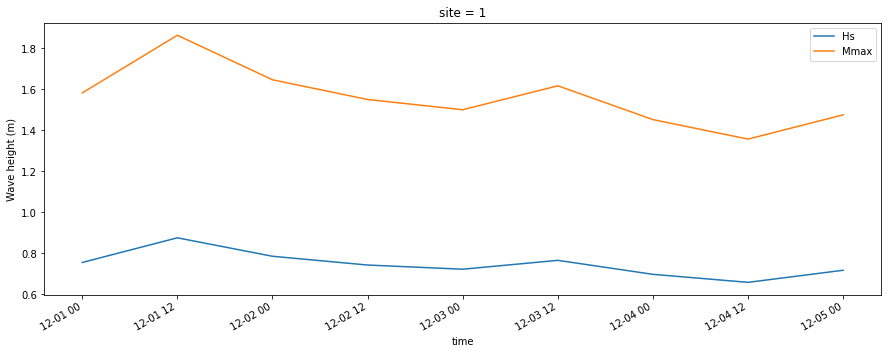

In [2]:
# Wave height

hs = dset.spec.hs()
hmax = dset.spec.hmax()

fig = plt.figure(figsize=(15, 5))
hs.isel(site=0).plot(label="Hs")
hmax.isel(site=0).plot(label="Mmax")
plt.ylabel("Wave height (m)")
plt.legend();

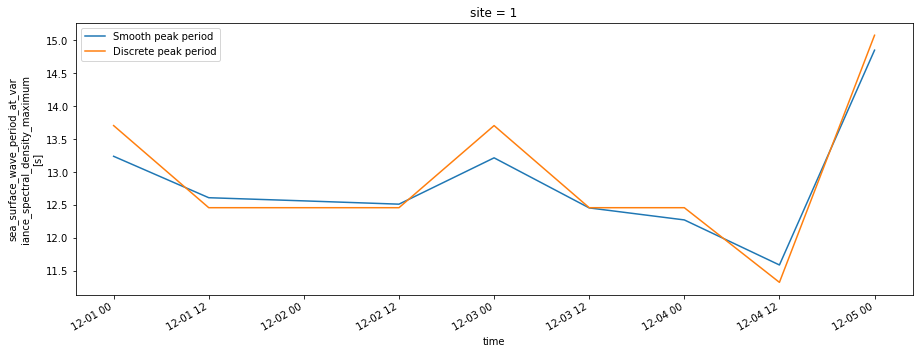

In [3]:
# Peak wave period
# Smooth (parabolic fit) vs discrete (frequency at the 1D peak)

tp_smooth = dset.spec.tp()
tp_discrete = dset.spec.tp(smooth=False)

fig = plt.figure(figsize=(15, 5))
tp_smooth.isel(site=0).plot(label="Smooth peak period")
tp_discrete.isel(site=0).plot(label="Discrete peak period")
plt.legend();

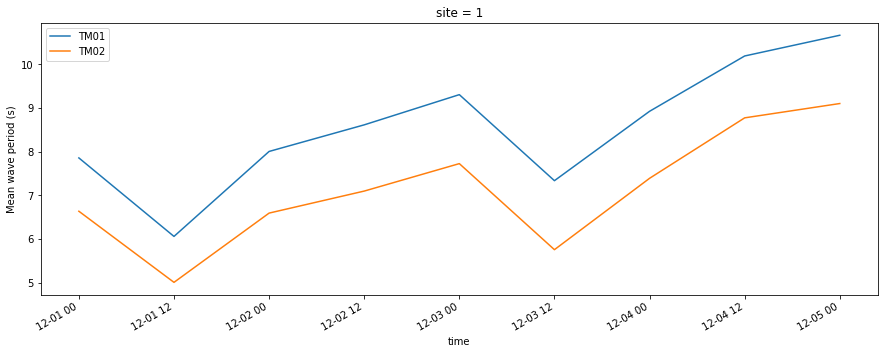

In [4]:
# Periods from the first and second moments

tm01 = dset.spec.tm01()
tm02 = dset.spec.tm02()

fig = plt.figure(figsize=(15, 5))
tm01.isel(site=0).plot(label="TM01")
tm02.isel(site=0).plot(label="TM02")
plt.ylabel("Mean wave period (s)")
plt.legend();

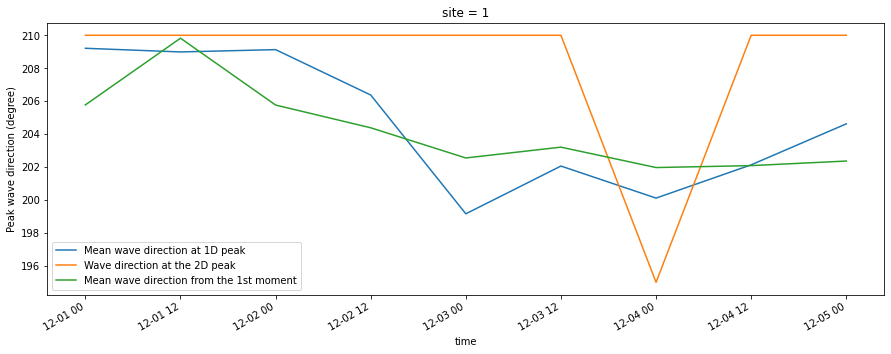

In [5]:
# Wave direction

dpm = dset.spec.dpm()
dp = dset.spec.dp()
dm = dset.spec.dm()

fig = plt.figure(figsize=(15, 5))
dpm.isel(site=0).plot(label="Mean wave direction at 1D peak")
dp.isel(site=0).plot(label="Wave direction at the 2D peak")
dm.isel(site=0).plot(label="Mean wave direction from the 1st moment")
plt.ylabel("Peak wave direction (degree)")
plt.legend();

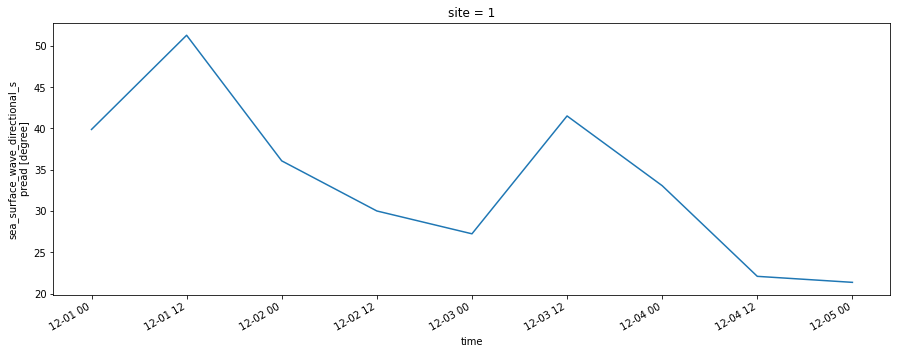

In [16]:
# Directional spreading

dspr = dset.spec.dspr()

dspr.isel(site=0).plot(figsize=(15, 5));

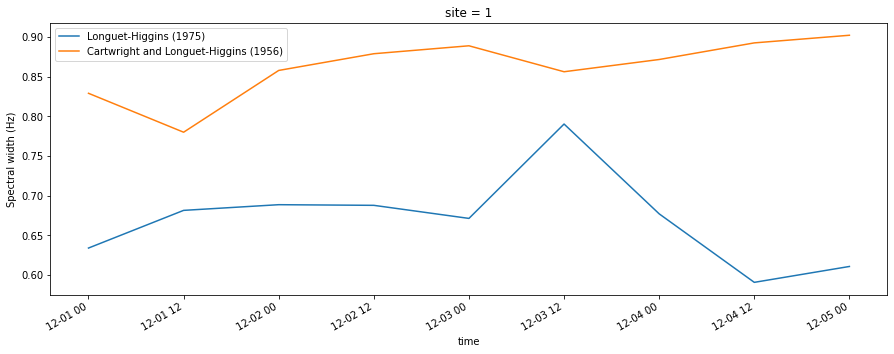

In [7]:
# Spectral width

sw_lh75 = dset.spec.sw()
sw_cl56 = dset.spec.swe()

fig = plt.figure(figsize=(15, 5))
sw_lh75.isel(site=0).plot(label="Longuet-Higgins (1975)")
sw_cl56.isel(site=0).plot(label="Cartwright and Longuet-Higgins (1956)")
plt.ylabel("Spectral width (Hz)")
plt.legend();

In [8]:
# Different stats simultaneously

stats = [
    "hs",
    "hmax",
    "tp",
    "tm01",
    "tm02",
    "dp",
    "dpm",
    "dm",
    "dspr",
    "sw",
    "swe",
]
ds = dset.spec.stats(stats)
ds

<xarray.Dataset>
Dimensions:  (site: 2, time: 9)
Coordinates:
  * site     (site) int32 1 2
  * time     (time) datetime64[ns] 2014-12-01 2014-12-01T12:00:00 ... 2014-12-05
Data variables:
    hs       (time, site) float64 0.7552 0.8013 0.8756 ... 0.683 0.7173 0.7955
    hmax     (time, site) float64 1.583 1.684 1.864 1.836 ... 1.402 1.476 1.661
    tp       (time, site) float32 dask.array<chunksize=(9, 2), meta=np.ndarray>
    tm01     (time, site) float64 7.856 7.503 6.058 6.654 ... 10.64 10.67 8.983
    tm02     (time, site) float64 6.635 6.297 5.006 5.44 ... 9.397 9.102 7.067
    dp       (time, site) float32 dask.array<chunksize=(9, 2), meta=np.ndarray>
    dpm      (time, site) float32 dask.array<chunksize=(9, 2), meta=np.ndarray>
    dm       (time, site) float32 205.8 206.0 209.8 207.6 ... 201.8 202.4 202.5
    dspr     (time, site) float64 39.88 45.12 51.29 49.71 ... 19.54 21.37 35.59
    sw       (time, site) float64 0.6341 0.6478 0.6816 ... 0.5304 0.6109 0.7846
    swe      (time, site) float64 0.8292 0.8192 0.7802 ... 0.8857 0.9024 0.8894
Attributes:
    standard_name:  sea_surface_wave_significant_height
    units:          m

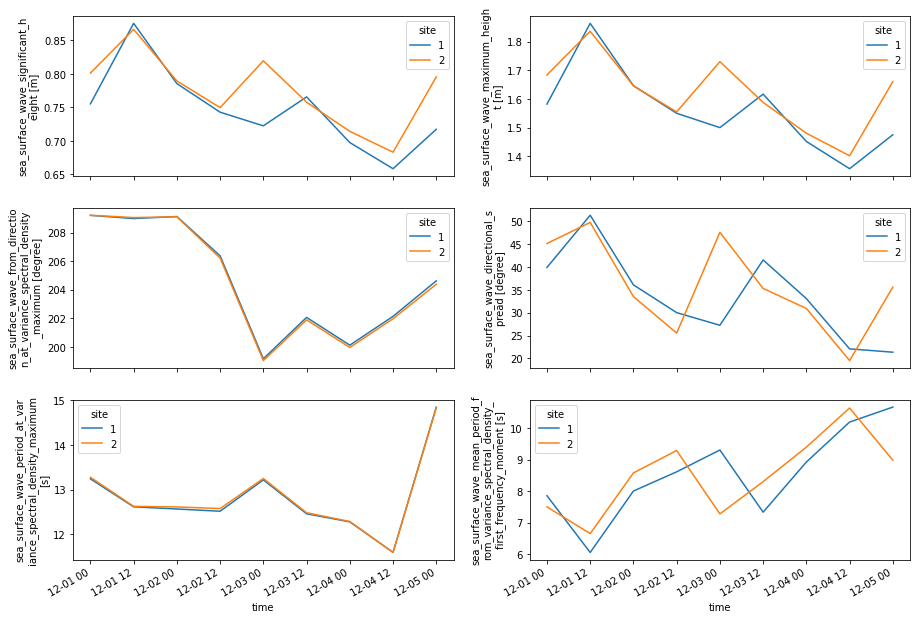

In [9]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 10))

ds.hs.plot.line(ax=ax1, x="time");
ds.hmax.plot.line(ax=ax2, x="time");
ds.dpm.plot.line(ax=ax3, x="time");
ds.dspr.plot.line(ax=ax4, x="time");
ds.tp.plot.line(ax=ax5, x="time");
ds.tm01.plot.line(ax=ax6, x="time");
for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xticklabels([])
    ax.set_xlabel("")

In [10]:
ds.to_netcdf("stats_from_spectra.nc")

!ncdump -h stats_from_spectra.nc

netcdf stats_from_spectra {
dimensions:
	site = 2 ;
	time = 9 ;
variables:
	int site(site) ;
		site:standard_name = "site" ;
		site:units = "" ;
	double time(time) ;
		time:_FillValue = NaN ;
		time:standard_name = "time" ;
		time:units = "days since 1990-01-01T00:00:00+00:00" ;
		time:calendar = "proleptic_gregorian" ;
	double hs(time, site) ;
		hs:_FillValue = NaN ;
		hs:standard_name = "sea_surface_wave_significant_height" ;
		hs:units = "m" ;
	double hmax(time, site) ;
		hmax:_FillValue = NaN ;
		hmax:standard_name = "sea_surface_wave_maximum_height" ;
		hmax:units = "m" ;
	float tp(time, site) ;
		tp:_FillValue = NaNf ;
		tp:standard_name = "sea_surface_wave_period_at_variance_spectral_density_maximum" ;
		tp:units = "s" ;
	double tm01(time, site) ;
		tm01:_FillValue = NaN ;
		tm01:standard_name = "sea_surface_wave_mean_period_from_variance_spectral_density_first_frequency_moment" ;
		tm01:units = "s" ;
	double tm02(time, site) ;
		tm02:_FillValue = NaN ;
		tm02:standard_name = "s

## Miscellaneous

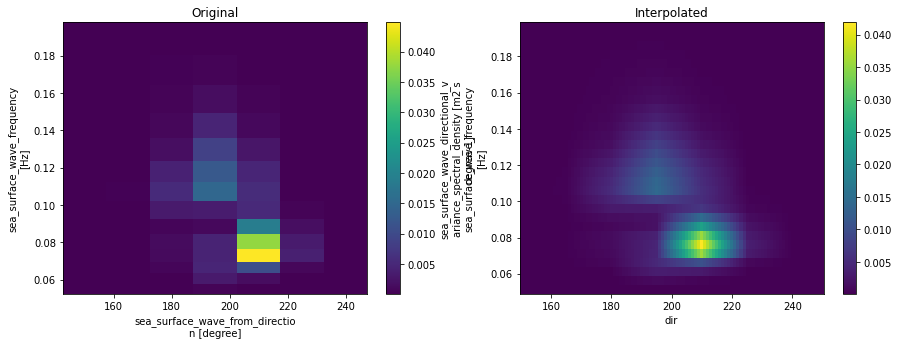

In [11]:
# Interpolate onto different spectral basis

freqs = np.arange(dset.freq[0], dset.freq[-1], 0.005)
dirs = np.arange(0, 361, 1)
darr_interp = dset.spec.interp(freq=freqs, dir=dirs)

fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(121)
darr = dset.efth.sortby("dir")
darr.isel(time=0, site=0).sel(dir=slice(150, 250), freq=slice(0.05, 0.2)).plot()
plt.title("Original");

ax = fig.add_subplot(122)
darr = darr_interp.sortby("dir")
darr.isel(time=0, site=0).sel(dir=slice(150, 250), freq=slice(0.05, 0.2)).plot()
plt.title("Interpolated");

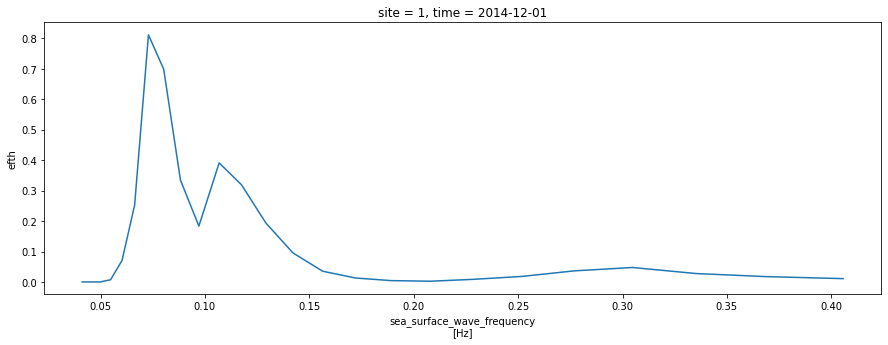

In [13]:
# Integrate over directions

ds = dset.isel(time=0, site=0).spec.oned()
ds
ds.plot(figsize=(15, 5));

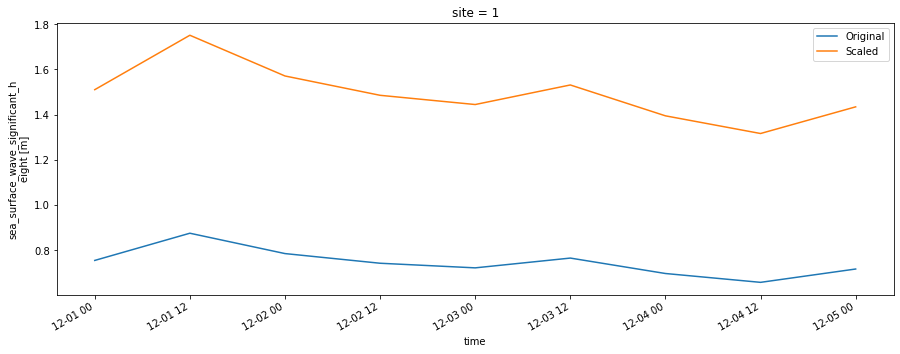

In [14]:
# Scale spectra with hs-based expression

dset_scaled = dset.spec.scale_by_hs(expr="2*hs")

fig = plt.figure(figsize=(15, 5))

dset.isel(site=0).spec.hs().plot(label="Original")
dset_scaled.isel(site=0).spec.hs().plot(label="Scaled")
plt.legend();

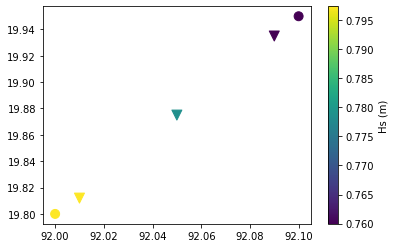

In [15]:
# Selecting and interpolating

idw = dset.spec.sel(
    lons=[92.01, 92.05, 92.09],
    lats=[19.812, 19.875, 19.935],
    method="idw"
)

p = plt.scatter(dset.lon, dset.lat, 80, dset.isel(time=0).spec.hs(), label="Dataset points")
p = plt.scatter(idw.lon, idw.lat, 100, idw.isel(time=0).spec.hs(), marker="v", label="Interpolated points")
plt.colorbar(p, label="Hs (m)");